In [28]:
import spacy
import os
import pandas as pd
import collections
import re
import seaborn as sns # For graphs
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [25]:
textList = []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)
df = pd.DataFrame(textList)
df.columns = ['text']
df

,text
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."
...,...
463,[NLS note: a graphic appears here - see image ...
464,REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
465,ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
466,SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...


In [26]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [29]:
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df = cleandf

In [62]:
testStr = df.loc[0, 'text']

In [63]:
doc=nlp(testStr)
# [(x.text,x.label_) for x in doc.ents]
ent = [x.label_ for x in doc.ents]

In [64]:
displacy.render(doc, style='ent')

<AxesSubplot:>

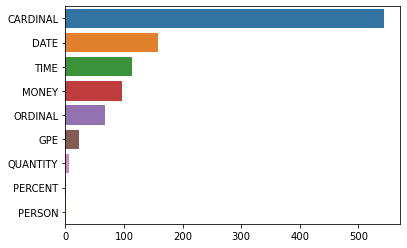

In [65]:
counter = collections.Counter(ent)
count = counter.most_common()
x,y = map(list,zip(*count))
sns.barplot(x=y,y=x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

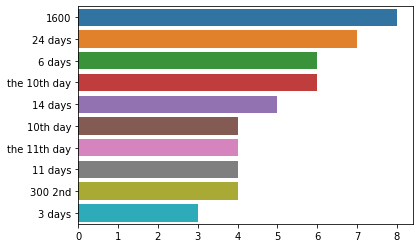

In [67]:
entGPE = [x.text for x in doc.ents if x.label_ == "DATE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

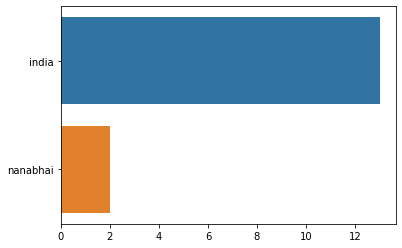

In [61]:
# GET GEO DATA FOR DF INDEX

dfIndex = 7
dfStr = df.loc[dfIndex, 'text']
doc = nlp(dfStr)
entGPE = [x.text for x in doc.ents if x.label_ == "GPE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

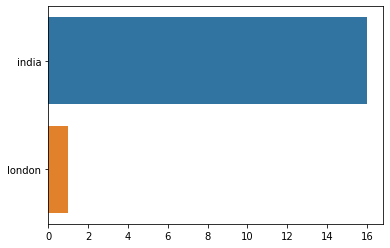

In [70]:
# GET GEO DATA FOR DF INDEX

dfIndex = 9
dfStr = df.loc[dfIndex, 'text']
doc = nlp(dfStr)
entGPE = [x.text for x in doc.ents if x.label_ == "GPE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

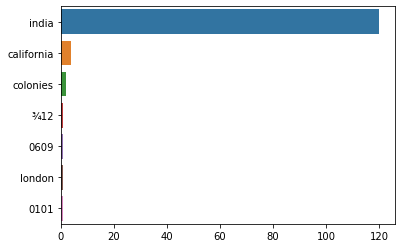

In [86]:
# GET GEO DATA FOR DF INDEX

dfIndex = 23
dfStr = df.loc[dfIndex, 'text']
doc = nlp(dfStr)
entGPE = [x.text for x in doc.ents if x.label_ == "GPE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

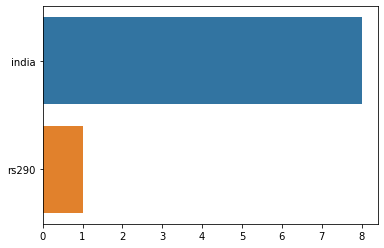

In [88]:
# GET GEO DATA FOR DF INDEX

dfIndex = 25
dfStr = df.loc[dfIndex, 'text']
doc = nlp(dfStr)
entGPE = [x.text for x in doc.ents if x.label_ == "GPE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

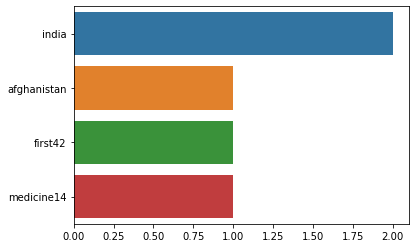

In [78]:
# GET GEO DATA FOR DF INDEX

dfIndex = 16
dfStr = df.loc[dfIndex, 'text']
doc = nlp(dfStr)
entGPE = [x.text for x in doc.ents if x.label_ == "GPE"]
counter = collections.Counter(entGPE)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

In [18]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [19]:
ent = df['text'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = Counter(ent)
count = counter.most_common()

ValueError: [E088] Text of length 1157700 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [ ]:
x,y = map(list,zip(*count))
sns.barplot(x=y,y=x)

In [ ]:
def nerGEO(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = df['text'].apply(lambda x: nerGEO(x))
gpe = [i for x in gpe for i in x]
counter = Counter(gpe)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)